<a href="https://colab.research.google.com/github/canaytsr/GlobalAIHubMLCourse/blob/main/Homeworks/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Generate dataset using make_blobs function in the sklearn.datasets class. Generate 2000 samples with 3 features (X) with one label (y)
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=2000, centers=3, n_features=3,random_state=0)
print(X.shape)
#print(X)
print(y)


(2000, 3)
[1 2 1 ... 1 2 1]


             x         y         z  label
0     0.378197 -0.822654  4.412505      1
1     0.112908  8.072768  9.914998      2
2     1.875986 -2.862337  1.955307      1
3    -1.210594  6.876798  9.223306      2
4     2.095730  3.335208  3.288496      0
...        ...       ...       ...    ...
1995  1.400683  5.393096  1.671082      0
1996 -2.237195  6.910680  8.794924      2
1997  1.582651 -0.526795  2.355266      1
1998 -1.033492  8.516043  9.546055      2
1999  2.269996 -2.522649  1.755616      1

[2000 rows x 4 columns]
          x         y         z  label
0  0.378197 -0.822654  4.412505      1
1  0.112908  8.072768  9.914998      2
2  1.875986 -2.862337  1.955307      1
3 -1.210594  6.876798  9.223306      2
4  2.095730  3.335208  3.288496      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   y       2000 no

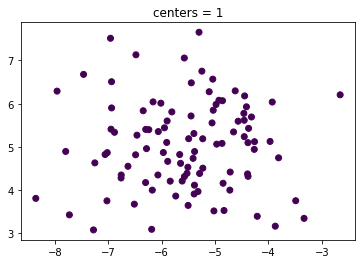

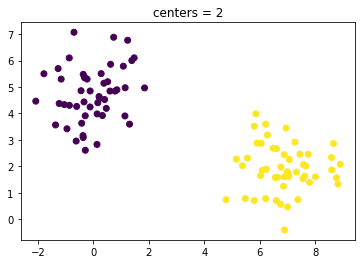

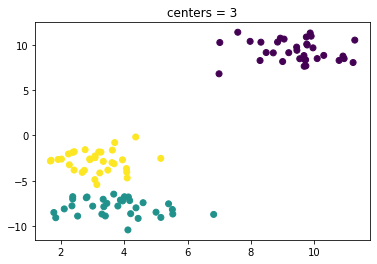

In [ ]:
#Explore and analyse raw data.
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

data = DataFrame(dict(x=X[:,0], y=X[:,1],z=X[:,2], label=y))
print(data)
print(data.head())
print(data.info())

print(data.describe())
print(data.info())
print(data.isna().sum())
print(data.groupby(by="label").count())

#Missing Values
print(data.dropna())
print(data.isnull().sum())

# plot 1
X1, y1 = make_blobs(n_features=2, centers=1)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.savefig('centers_1.png')
plt.title('centers = 1')

# plot 2    
X2, y2 = make_blobs(n_features=2, centers=2)
plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.title('centers = 2')

#plot3
X3, y3 = make_blobs(n_features=2, centers=3)
plt.figure()
plt.scatter(X3[:, 0], X3[:, 1], c=y3)
plt.title('centers = 3')

plt.show()


In [ ]:
#Do preprocessing for classification.

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
data["Label"] = label_encoder.fit_transform(data["label"]) 
data["Label"].value_counts()
print(data.head())

categories = list(label_encoder.inverse_transform([0, 1, 2]))
categories

#X, y = data.iloc[: , :-1], data.iloc[: , -1]



          x         y         z  label  Label
0  0.378197 -0.822654  4.412505      1      1
1  0.112908  8.072768  9.914998      2      2
2  1.875986 -2.862337  1.955307      1      1
3 -1.210594  6.876798  9.223306      2      2
4  2.095730  3.335208  3.288496      0      0


[0, 1, 2]

In [ ]:
#Split your dataset into train and test test (0.7 for train and 0.3 for test).

from sklearn.model_selection import train_test_split
from sklearn import svm
X_train, X_test, y_train,y_test=train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=123) 
print(X_train)


[[ 1.08461963  4.5654558   1.14051219]
 [ 2.69848778  4.7648368   2.87241647]
 [ 3.08640284 -1.06540176  4.0879479 ]
 ...
 [ 0.3602126  -0.84412369  1.71695525]
 [-0.13722449  7.48027067 10.23703453]
 [-2.19773826  6.19251268 10.08648907]]


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)

print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test)) 
BiasTr = 1-(clf.score(X_train,y_train))
BiasTs = 1-(clf.score(X_test,y_test))
print("Bias for training = ",BiasTr)
print("Bias for test = ",BiasTs)
print("Variance = test bias - training bias = ", BiasTs-BiasTr,"\n")

# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

Accuracy of train: 1.0
Accuracy of test: 0.9983333333333333
Bias for training =  0.0
Bias for test =  0.0016666666666667052
Variance = test bias - training bias =  0.0016666666666667052 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       196
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       203

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [ ]:
#Evaluate model pipeline on test data
from sklearn.metrics import mean_squared_error, r2_score
y_pred = clf.predict(X_test)
print(r2_score(y_test, y_pred))
 
print (mean_squared_error(y_test, y_pred))

0.9974932212524702
0.0016666666666666668


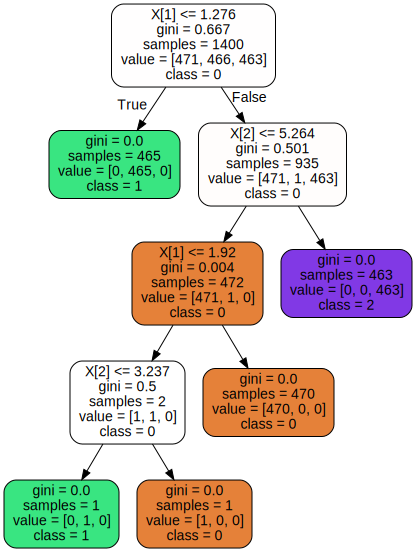

In [ ]:
import os
from sklearn.tree import export_graphviz
import graphviz
classes = ['0', '1', '2']
dot_data = export_graphviz(clf, out_file=None,
                     class_names=classes,
                     filled=True, rounded=True
                    )
graph = graphviz.Source(dot_data)
graph

In [ ]:
#XGBoos
import xgboost as xgb

dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)
preds = model.predict(dmatrix_test)
preds[:5]

array([[0.9963404 , 0.00182813, 0.00183146],
       [0.9963404 , 0.00182813, 0.00183146],
       [0.00199098, 0.9961791 , 0.00182992],
       [0.00199098, 0.9961791 , 0.00182992],
       [0.00199869, 0.00184728, 0.996154  ]], dtype=float32)

In [ ]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds


array([0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2,
       0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 2,
       2, 1, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1,
       1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 2,
       0, 1, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2,
       2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2, 1, 0, 0,
       1, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 2,
       0, 1, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1,
       2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0,

In [ ]:
#Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       196
           1       1.00      1.00      1.00       201
           2       1.00      1.00      1.00       203

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [ ]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9983498349834984
Recall = 0.9982993197278912
Accuracy = 0.9983333333333333
F1 Score = 0.998320355221601


In [ ]:
#There is not underfitting and overfitting problem.
#Underfitting – High bias and low variance
#Overfitting – High variance and low bias